# this is used to train the xgboost classification algorithm

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [11]:
path = r'' ### customize this path to excute following codes

### reading the relevant data

In [12]:
metadata = pd.read_csv(path+'\metadata.csv')

In [13]:
train_dataset = pd.read_csv(path+r'\NLP_training\train_dataset.csv')
x_train = train_dataset['text']
y_train = train_dataset['label']
test_dataset = pd.read_csv(path+r'\NLP_training\test_dataset.csv')
x_test = test_dataset['text']
y_test = test_dataset['label']

### vectorize the words to be used in xgboost

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

input = x_train.copy()

tfidf = TfidfVectorizer(max_features = 10000,max_df=0.99,min_df = 2,stop_words = 'english',ngram_range = (1,2))
tfidf.fit(input)
x_train = tfidf.transform(x_train)
x_test = tfidf.transform(x_test)

In [15]:
features = pd.DataFrame(x_train.todense(), columns = tfidf.get_feature_names())

features.head()

,00,10,10 10,10 50,10 95,10 min,10 mins,10 minutes,10 pay,10 person,...,yummy dim,yummy food,yummy good,yummy place,yummy service,yummy yummy,zero,zero star,zero stars,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### train the xgboost classifier

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
xgbc = XGBClassifier(500,colsample_bylevel = 0.9,colsample_bytree = 0.9)

In [ ]:
xgbc.fit(x_train,y_train)
pickle.dump(xgbc, open(path+r'xgboost.dat', 'wb'))

In [17]:
xgbc = pickle.load(open(path+r'\xgboost.dat', 'rb'))

In [18]:
pred_xgbc = xgbc.predict(x_test)

In [19]:
pd.DataFrame(pred_xgbc).to_csv('pred_xgbc.csv',index = False)

### make relevant analysis of the prediction results

In [20]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

confusion_matrix(y_test,pred_xgbc,normalize = 'pred')

array([[0.72      , 0.47619048, 0.18333333, 0.01530612, 0.02247191],
       [0.11      , 0.14285714, 0.13333333, 0.03571429, 0.01123596],
       [0.09      , 0.19047619, 0.3       , 0.19897959, 0.03691814],
       [0.05      , 0.04761905, 0.28333333, 0.42346939, 0.24879615],
       [0.03      , 0.14285714, 0.1       , 0.32653061, 0.68057785]])

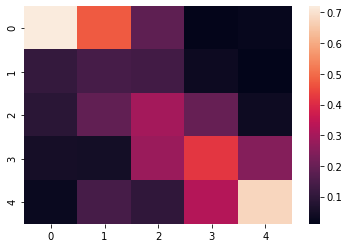

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred_xgbc,normalize = 'pred'))

In [22]:
print(f1_score(y_test,pred_xgbc,average = None))

[0.68571429 0.10526316 0.23529412 0.36323851 0.75512021]


In [23]:
accuracy_score(y_test,pred_xgbc)

0.6